In [1]:
#import statements 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
pop_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Population Data.csv')
dom_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Dom Data V2.csv')

In [11]:
##Basic cleaning
flight_pop = pop_raw.iloc[:,0:12].dropna()
flight_pop.head()

,Date,Earth,Plague,Wind,Water,Lightning,Ice,Shadow,Light,Arcane,Nature,Fire
0,6/8/2013,30.0,80.0,169.0,57.0,85.0,72.0,126.0,91.0,115.0,95.0,59.0
1,6/19/2013,464.0,1295.0,1470.0,796.0,1333.0,796.0,1485.0,1000.0,1548.0,1220.0,841.0
2,7/9/2013,803.0,2421.0,3302.0,1509.0,2429.0,1663.0,2092.0,1761.0,2903.0,2229.0,1576.0
3,7/14/2013,887.0,2737.0,3740.0,1701.0,2726.0,1934.0,3299.0,1984.0,3273.0,2486.0,1763.0
4,9/13/2013,1080.0,3448.0,4732.0,2205.0,3513.0,2600.0,4223.0,2581.0,4207.0,3205.0,2203.0


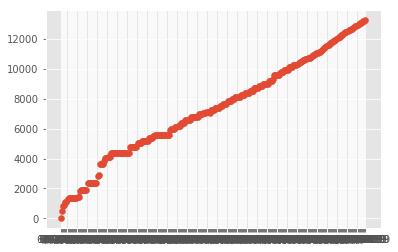

In [15]:
plt.scatter(np.array(flight_pop.loc[:,'Date']),np.array(flight_pop.loc[:,'Earth'])) ##Just checking that this Works

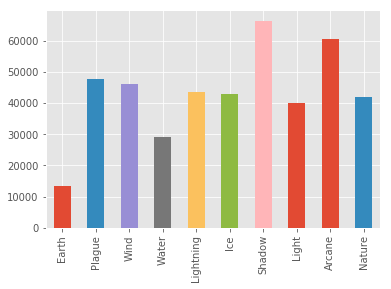

In [21]:
current_pop = flight_pop.iloc[-1,1:-1]
current_pop.plot.bar() ##Need to set to flight colors 